In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from os import listdir, path 

In [12]:
alg_output_folders = {
  "SPMST": "output_data-SPMST_ver3",
  "RSPH": "output_data-RSPH_ver2",
  "SPGA": "output_data-SPGA_ver2",
}
ordered_types = ["Type_1_Small", "Type_5_Small", "Type_6_Small", "Type_1_Large", "Type_6_Large"]
df = pd.DataFrame
for alg in alg_output_folders:
  for instype_csv in listdir(alg_output_folders[alg]):
    if instype_csv[-4:] == ".csv":
      tmp = pd.read_csv(alg_output_folders[alg] + "\\" + instype_csv)
      if df.empty:
        df = tmp
      else:
        df = df.append(tmp)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  12034 non-null  object 
 1   Type       12034 non-null  object 
 2   Instance   12034 non-null  object 
 3   Seed       12034 non-null  object 
 4   BF         12034 non-null  object 
 5   Rs         12034 non-null  float64
dtypes: float64(1), object(5)
memory usage: 658.1+ KB


In [13]:
valid_instances = []
for i in df[df.Type.isin(ordered_types)].Instance.unique():
  c = df[df.Instance == i].count()
  if c["Instance"] == 90:
    valid_instances.append(i)
valid_instances

['100rat783',
 '10a280',
 '10gil262',
 '10lin318',
 '10pcb442',
 '10pr439',
 '25a280',
 '25gil262',
 '25lin318',
 '25pcb442',
 '25pr439',
 '50a280',
 '50gil262',
 '50lin318',
 '50pcb442',
 '50pr439',
 '10berlin52',
 '10eil51',
 '10eil76',
 '10kroB100',
 '10pr76',
 '10rat99',
 '10st70',
 '15berlin52',
 '15eil51',
 '15eil76',
 '15pr76',
 '15st70',
 '25eil101',
 '25kroA100',
 '25lin105',
 '25rat99',
 '50eil101',
 '50kroA100',
 '50kroB100',
 '50lin105',
 '50rat99',
 '5berlin52',
 '5eil51',
 '5eil76',
 '5pr76',
 '5st70',
 '75lin105',
 '10i120-46',
 '10i30-17',
 '10i45-18',
 '10i60-21',
 '10i65-21',
 '10i70-21',
 '10i75-22',
 '10i90-33',
 '5i120-46',
 '5i30-17',
 '5i45-18',
 '5i60-21',
 '5i65-21',
 '5i70-21',
 '5i75-22',
 '5i90-33',
 '7i30-17',
 '7i45-18',
 '7i60-21',
 '7i65-21',
 '7i70-21',
 '18pr439-3x6',
 '20pr439-4x5',
 '25a280-5x5',
 '25gil262-5x5',
 '25lin318-5x5',
 '25pcb442-5x5',
 '36pcb442-6x6',
 '42a280-6x7',
 '49gil262-7x7',
 '49lin318-7x7',
 '9a280-3x3',
 '9gil262-3x3',
 '9lin318

In [14]:
instypes = {}
for t in ordered_types:
  instypes[t] = df.loc[(df.Type == t) & (df.Instance.isin(valid_instances))].Instance.unique()

instypes

{'Type_1_Small': array(['10berlin52', '10eil51', '10eil76', '10kroB100', '10pr76',
        '10rat99', '10st70', '15berlin52', '15eil51', '15eil76', '15pr76',
        '15st70', '25eil101', '25kroA100', '25lin105', '25rat99',
        '50eil101', '50kroA100', '50kroB100', '50lin105', '50rat99',
        '5berlin52', '5eil51', '5eil76', '5pr76', '5st70', '75lin105'],
       dtype=object),
 'Type_5_Small': array(['10i120-46', '10i30-17', '10i45-18', '10i60-21', '10i65-21',
        '10i70-21', '10i75-22', '10i90-33', '5i120-46', '5i30-17',
        '5i45-18', '5i60-21', '5i65-21', '5i70-21', '5i75-22', '5i90-33',
        '7i30-17', '7i45-18', '7i60-21', '7i65-21', '7i70-21'],
       dtype=object),
 'Type_6_Small': array(['10berlin52-2x5', '12eil51-3x4', '12eil76-3x4', '12pr76-3x4',
        '12st70-3x4', '15pr76-3x5', '16eil51-4x4', '16eil76-4x4',
        '16lin105-4x4', '16st70-4x4', '18pr76-3x6', '20eil51-4x5',
        '20eil76-4x5', '20st70-4x5', '25eil101-5x5', '25eil51-5x5',
        '25eil

In [15]:
best = {}
for insname in df.Instance.unique():
  best[insname] = min(df.BF[insname == df.Instance])

df['Best'] = [best[row.Instance] for index, row in df.iterrows()]
df['RPD'] = (df['BF'] - df['Best']) * 100 / df['Best']
df.dropna(subset=["RPD"], inplace=True)
df

,Algorithm,Type,Instance,Seed,BF,Rs,Best,RPD
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202,1311,3272.997712
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315,1311,3272.997712
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333,1311,3272.997712
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564,1311,3272.997712
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075,1311,3272.997712
...,...,...,...,...,...,...,...,...
1105,SPGA,Type_6_Small,9st70-3x3,25,804,11.737460,804,0.0
1106,SPGA,Type_6_Small,9st70-3x3,26,804,11.603497,804,0.0
1107,SPGA,Type_6_Small,9st70-3x3,27,804,12.331345,804,0.0
1108,SPGA,Type_6_Small,9st70-3x3,28,804,11.970105,804,0.0


<AxesSubplot:xlabel='Type', ylabel='RPD'>

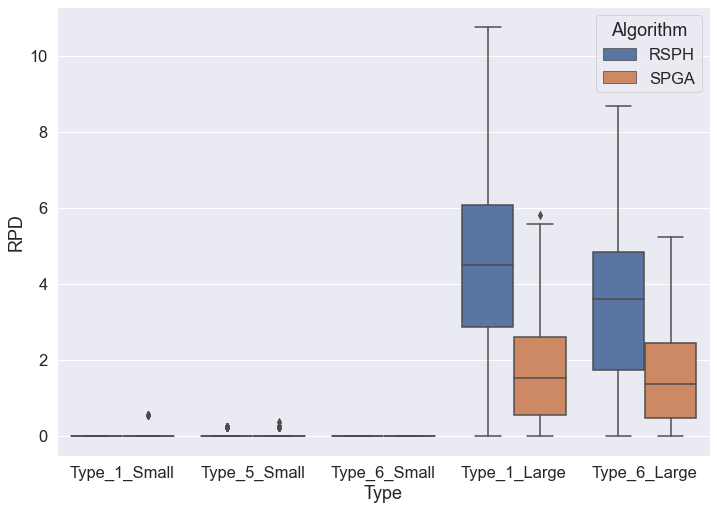

In [32]:
rcParams['figure.figsize'] = 11.7,8.27
data = df[(df.Algorithm != "SPMST") & (df.Instance.isin(valid_instances))]
sns.set(font_scale = 1.5)
sns.boxplot(x = 'Type', y = 'RPD', data = data, hue = 'Algorithm', order=ordered_types)

In [17]:
# Calculate BF and AVG of each algorithm on each instance
instances = valid_instances
algorithms = df.Algorithm.unique()
columns = []
for alg in algorithms:
  columns.append(alg + "_BF")
  columns.append(alg + "_AVG")

print(columns)

arr = [[0 for alg in columns] for i in instances]
for i in range(len(instances)):
  ins = instances[i]
  for j in range(len(columns)):
    alg = columns[j].split("_")[0]
    op = columns[j].split("_")[1]
    tmp = df.loc[(alg == df.Algorithm) & (ins == df.Instance)].BF
    if op == "BF":
      arr[i][j] = 0 if len(tmp) == 0 else min(tmp)
    else:
      arr[i][j] = 0 if len(tmp) == 0 else sum(tmp)/len(tmp)

df2 = pd.DataFrame(np.array(arr), columns=columns, index=instances)
df2

['SPMST_BF', 'SPMST_AVG', 'RSPH_BF', 'RSPH_AVG', 'SPGA_BF', 'SPGA_AVG']


,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG
100rat783,44220.0,44220.0,1393.0,1417.400000,1311.0,1355.266667
10a280,8901.0,8901.0,742.0,751.700000,741.0,743.766667
10gil262,7324.0,7324.0,755.0,763.700000,755.0,755.500000
10lin318,8738.0,8738.0,682.0,691.933333,682.0,688.966667
10pcb442,10846.0,10846.0,626.0,635.733333,613.0,627.966667
...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,891.0,891.000000,891.0,891.000000
9eil51-3x3,4140.0,4140.0,863.0,863.000000,863.0,863.000000
9eil76-3x3,3334.0,3334.0,857.0,857.000000,857.0,857.000000
9pr76-3x3,4583.0,4583.0,900.0,900.000000,900.0,900.000000


In [37]:
df2["PI_SPGA_SPMST"] = (df2["SPMST_AVG"] - df2["SPGA_AVG"]) / df2["SPMST_AVG"] * 100
df2["PI_SPGA_RSPH"] = (df2["RSPH_AVG"] - df2["SPGA_AVG"]) / df2["RSPH_AVG"] * 100
df2

,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG,PI_SPGA_SPMST,PI_SPGA_RSPH
100rat783,44220.0,44220.0,1393.0,1417.400000,1311.0,1355.266667,96.935173,4.383613
10a280,8901.0,8901.0,742.0,751.700000,741.0,743.766667,91.644010,1.055386
10gil262,7324.0,7324.0,755.0,763.700000,755.0,755.500000,89.684599,1.073720
10lin318,8738.0,8738.0,682.0,691.933333,682.0,688.966667,92.115282,0.428750
10pcb442,10846.0,10846.0,626.0,635.733333,613.0,627.966667,94.210154,1.221686
...,...,...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,891.0,891.000000,891.0,891.000000,75.501787,0.000000
9eil51-3x3,4140.0,4140.0,863.0,863.000000,863.0,863.000000,79.154589,0.000000
9eil76-3x3,3334.0,3334.0,857.0,857.000000,857.0,857.000000,74.295141,0.000000
9pr76-3x3,4583.0,4583.0,900.0,900.000000,900.0,900.000000,80.362208,0.000000


In [27]:
def get_type_instances(t):
  return df2.loc[instypes[t]]

get_type_instances("Type_6_Large")

,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG,PI_SPGA_SPMST,PI_SPGA_RSPH
18pr439-3x6,11135.0,11135.0,675.0,689.200000,667.0,675.500000,93.933543,1.987812
20pr439-4x5,10968.0,10968.0,639.0,653.800000,626.0,645.500000,94.114697,1.269501
25a280-5x5,12112.0,12112.0,942.0,964.066667,931.0,945.933333,92.190114,1.880921
25gil262-5x5,12812.0,12812.0,901.0,920.066667,884.0,893.233333,93.028151,2.916455
25lin318-5x5,13711.0,13711.0,975.0,994.166667,938.0,964.333333,92.966718,3.000838
25pcb442-5x5,16728.0,16728.0,884.0,899.700000,852.0,865.733333,94.824645,3.775333
36pcb442-6x6,17437.0,17437.0,1062.0,1086.900000,1026.0,1052.000000,93.966852,3.210967
42a280-6x7,11790.0,11790.0,1059.0,1110.966667,1048.0,1065.800000,90.960136,4.065529
49gil262-7x7,15447.0,15447.0,1162.0,1173.300000,1153.0,1161.466667,92.480956,1.008551
49lin318-7x7,16531.0,16531.0,1280.0,1301.666667,1261.0,1276.033333,92.280967,1.969270


In [21]:
which_pi = "PI_SPGA_RSPH"

arr = []
for i in ordered_types:
  instances = instypes[i]
  tmp = df2.loc[instances][which_pi].dropna()
  if len(tmp) > 0:
    arr.append([min(tmp), sum(tmp) / len(tmp), max(tmp), str(sum(1 for pi in tmp if pi > 0)) + "/" + str(len(tmp))])
  else:
    arr.append([0, 0, 0, "0/0"])

dfpi = pd.DataFrame(arr, columns=["Minimum PI", "Average PI", "Maximum PI", "Better"], index=ordered_types)
dfpi

,Minimum PI,Average PI,Maximum PI,Better
Type_1_Small,-0.089445,-0.003313,0.000000,0/27
Type_5_Small,-0.019791,-0.000942,0.000000,0/21
Type_6_Small,0.000000,0.000000,0.000000,0/37
Type_1_Large,0.428750,2.630473,4.751355,16/16
Type_6_Large,0.009920,1.847138,4.065529,15/15


In [43]:
df3 = pd.DataFrame()
df3[["SPMST", "RSPH", "SPGA"]] = df2[["SPMST_AVG", "RSPH_AVG", "SPGA_AVG"]]
df3.to_csv("result.csv")
df3